In [4]:
# In terminal
# pip install git+https://github.com/edikedik/eBoruta.git

import logging
import typing as t

import pandas as pd
from sklearn.ensemble import RandomForestClassifier  # or RandomForestRegressor for regression tasks


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap
import xgboost as xgb
#from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from xgboost import XGBRegressor

from sklearn.ensemble import RandomForestRegressor

from eBoruta import eBoruta, TrialData, Features, Dataset, setup_logger

In [6]:

# Load the csv
df = pd.read_csv('oil_data.csv')

print(df.shape)

x = df.drop(['Oil brent price ($/bbl)'], 1)
y = df['Oil brent price ($/bbl)']


# Normalize x
min_vals = x.min()
max_vals = x.max()
x = (x - min_vals) / (max_vals - min_vals)




(624, 24)


In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


In [8]:
def plot_imp_history(df_history: pd.DataFrame):
    sns.lineplot(x='Step', y='Importance', hue='Feature', data=df_history)
    sns.lineplot(x='Step', y='Threshold', data=df_history, linestyle='--', linewidth=4)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

Boruta trials:   0%|          | 0/20 [00:00<?, ?it/s]

['Year' 'Cononut oil ($/mt)' 'Sugar ($/kg)' 'Us crude oil reserves'
 'Quantity oil embarked (million of tons)'
 'Quantity goods embarked (million of tons)' 'War' 'World imports'
 'World exports' 'Value of Solar Consumption (EJ)' 'Inflation'
 'Value of Wind Consumption (EJ)' 'Value of Nuclear Consumption (EJ)'
 'Value of Natural Gas Consumption (BcF)' 'Population' 'Price gold'
 'GDP Growth' 'Crude oil and NGL production' 'World-oil demand'
 'Value of Freight Transport'] ['Pandemic (covid)' 'OPEC cuts on production'] ['Electric car registrations']


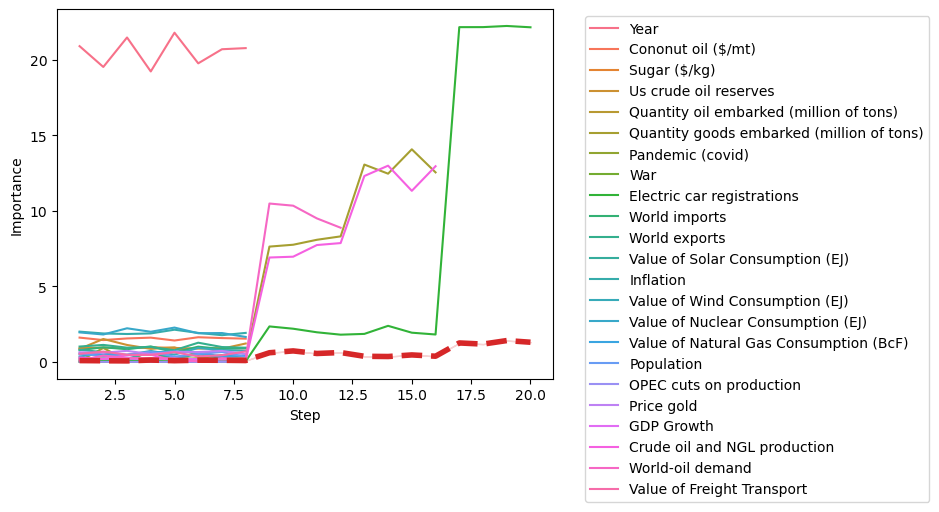

                                      Feature  Importance
0                                        Year   20.234560
14          Value of Nuclear Consumption (EJ)    1.905942
12                                  Inflation    1.672031
1                          Cononut oil ($/mt)    1.562180
10                              World exports    1.164869
9                               World imports    1.081430
2                                Sugar ($/kg)    1.046645
3                       Us crude oil reserves    0.994357
18                                 Price gold    0.860289
16                                 Population    0.536749
22                 Value of Freight Transport    0.480136
21                           World-oil demand    0.472419
15     Value of Natural Gas Consumption (BcF)    0.468955
13             Value of Wind Consumption (EJ)    0.373110
11            Value of Solar Consumption (EJ)    0.252065
7                                         War    0.233659
20            

Boruta trials:   0%|          | 0/20 [00:00<?, ?it/s]

['Year' 'Cononut oil ($/mt)' 'Sugar ($/kg)' 'Us crude oil reserves'
 'Quantity oil embarked (million of tons)'
 'Quantity goods embarked (million of tons)' 'War' 'World imports'
 'World exports' 'Value of Solar Consumption (EJ)' 'Inflation'
 'Value of Wind Consumption (EJ)' 'Value of Nuclear Consumption (EJ)'
 'Value of Natural Gas Consumption (BcF)' 'Population' 'Price gold'
 'GDP Growth' 'Crude oil and NGL production' 'World-oil demand'
 'Value of Freight Transport'] ['Pandemic (covid)' 'OPEC cuts on production'] ['Electric car registrations']


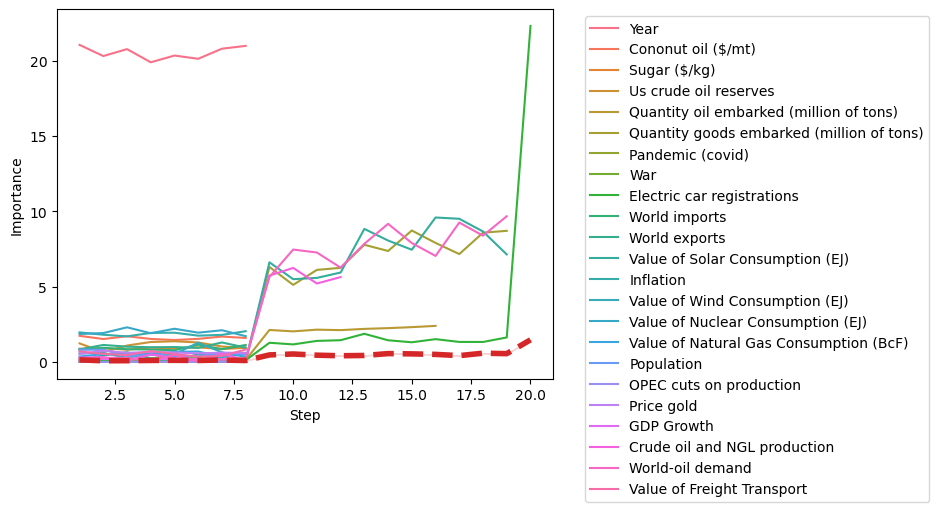

                                      Feature  Importance
0                                        Year   19.992478
14          Value of Nuclear Consumption (EJ)    2.108128
12                                  Inflation    1.871585
1                          Cononut oil ($/mt)    1.685655
10                              World exports    1.469690
3                       Us crude oil reserves    1.164277
2                                Sugar ($/kg)    0.935489
9                               World imports    0.884968
18                                 Price gold    0.825314
15     Value of Natural Gas Consumption (BcF)    0.603480
22                 Value of Freight Transport    0.585260
16                                 Population    0.580188
11            Value of Solar Consumption (EJ)    0.400485
13             Value of Wind Consumption (EJ)    0.388278
19                                 GDP Growth    0.207768
7                                         War    0.204669
5   Quantity g

Boruta trials:   0%|          | 0/20 [00:00<?, ?it/s]

['Year' 'Cononut oil ($/mt)' 'Sugar ($/kg)' 'Us crude oil reserves'
 'Quantity oil embarked (million of tons)'
 'Quantity goods embarked (million of tons)' 'War' 'World imports'
 'World exports' 'Value of Solar Consumption (EJ)' 'Inflation'
 'Value of Wind Consumption (EJ)' 'Value of Nuclear Consumption (EJ)'
 'Value of Natural Gas Consumption (BcF)' 'Population' 'Price gold'
 'GDP Growth' 'Crude oil and NGL production' 'World-oil demand'
 'Value of Freight Transport'] ['Pandemic (covid)' 'OPEC cuts on production'] ['Electric car registrations']


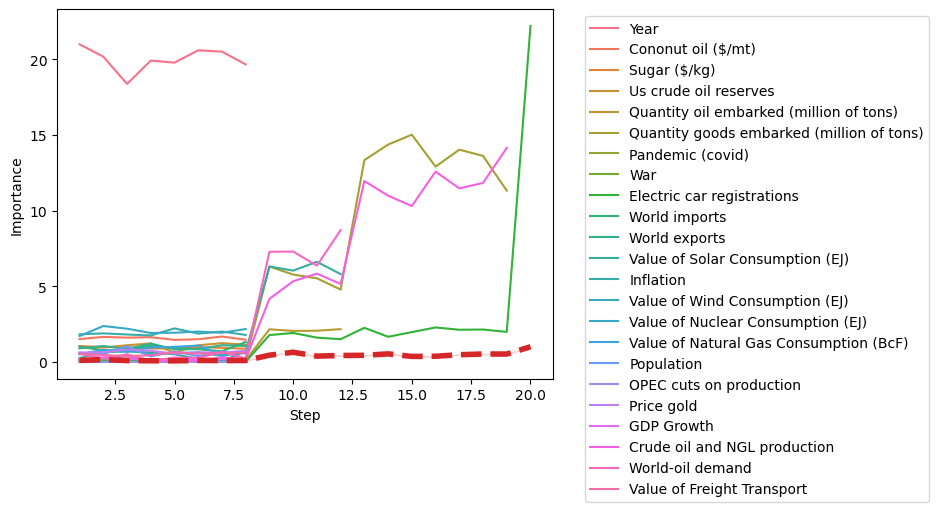

                                      Feature  Importance
0                                        Year   19.748860
14          Value of Nuclear Consumption (EJ)    1.979748
12                                  Inflation    1.882211
1                          Cononut oil ($/mt)    1.739799
3                       Us crude oil reserves    1.256178
9                               World imports    1.112635
10                              World exports    1.049687
2                                Sugar ($/kg)    0.976215
11            Value of Solar Consumption (EJ)    0.780385
18                                 Price gold    0.695671
13             Value of Wind Consumption (EJ)    0.648920
15     Value of Natural Gas Consumption (BcF)    0.555722
22                 Value of Freight Transport    0.517009
16                                 Population    0.505408
19                                 GDP Growth    0.222098
7                                         War    0.215709
4     Quantity

Boruta trials:   0%|          | 0/20 [00:00<?, ?it/s]

['Year' 'Cononut oil ($/mt)' 'Sugar ($/kg)' 'Us crude oil reserves'
 'Quantity oil embarked (million of tons)'
 'Quantity goods embarked (million of tons)' 'World imports'
 'World exports' 'Value of Solar Consumption (EJ)' 'Inflation'
 'Value of Wind Consumption (EJ)' 'Value of Nuclear Consumption (EJ)'
 'Value of Natural Gas Consumption (BcF)' 'Population' 'Price gold'
 'GDP Growth' 'Crude oil and NGL production' 'World-oil demand'
 'Value of Freight Transport'] ['Pandemic (covid)' 'OPEC cuts on production'] ['War' 'Electric car registrations']


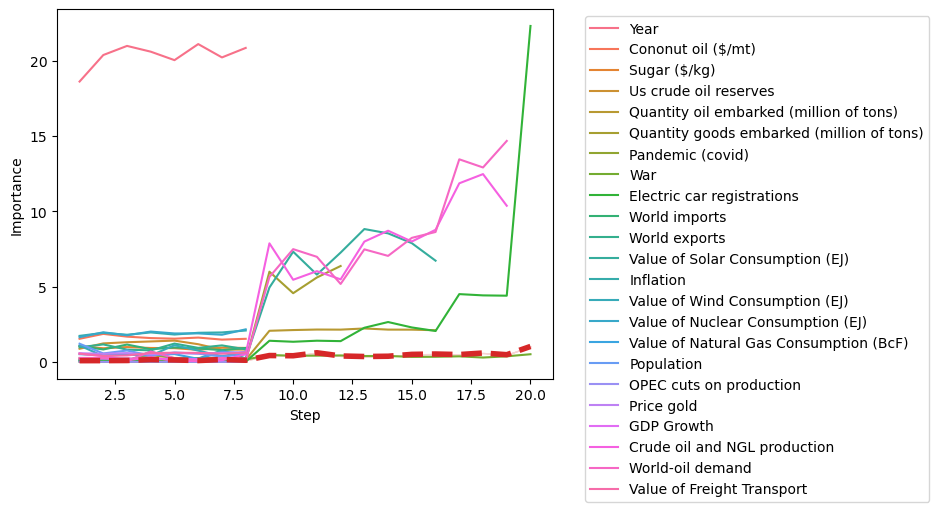

                                      Feature  Importance
0                                        Year   20.628075
14          Value of Nuclear Consumption (EJ)    1.892436
12                                  Inflation    1.813063
1                          Cononut oil ($/mt)    1.738061
3                       Us crude oil reserves    1.579149
9                               World imports    1.120785
2                                Sugar ($/kg)    0.976841
10                              World exports    0.862233
18                                 Price gold    0.784546
5   Quantity goods embarked (million of tons)    0.650198
16                                 Population    0.616231
22                 Value of Freight Transport    0.467407
13             Value of Wind Consumption (EJ)    0.384025
15     Value of Natural Gas Consumption (BcF)    0.320218
19                                 GDP Growth    0.241645
7                                         War    0.228683
11            

Boruta trials:   0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
# To check reproducibility of results 

boruta = eBoruta(n_iter = 20, verbose=2, classification = False, test_stratify = False)
boruta.fit(x, y);
features = boruta.features_
print(features.accepted, features.rejected, features.tentative)
df = features.history
plot_imp_history(df)
r=boruta.rank(sort = True)
print(r)
dictionary = dict(zip(r['Feature'], r['Importance'].apply(lambda x: [x])))
print(dictionary)
for _ in range(5):
    boruta = eBoruta(n_iter = 20, verbose=2, classification = False, test_stratify = False)
    boruta.fit(x, y);
    features = boruta.features_
    print(features.accepted, features.rejected, features.tentative)
    df = features.history
    plot_imp_history(df)
    r=boruta.rank(sort = True)
    print(r)
    dictionary2 = dict(zip(r['Feature'], r['Importance'].apply(lambda x: [x])))
    print(dictionary2)
    
    for key, value in dictionary2.items():
        if key in dictionary:
            if "[" in value:
                dictionary[key].append(value[0])
            else:
                dictionary[key].append(value)
        else:
            if "[" in value:
                dictionary[key]=[value[0]]
            else:
                dictionary[key]=[value]

print(dictionary)

In [ ]:
new_dict = {}
for key, value in dictionary.items():
    v=[]
    for e in value:
        e=str(e)
        if "[" in e:
            e=e[1:-1]
        e=float(e)
        v.append(e)
    mean_value = sum(v) / len(v)
    new_dict[key] = mean_value

sorted_dict = dict(sorted(new_dict.items(), key=lambda x: x[1],reverse=True))

print(sorted_dict)

{'Year': 0.1489505673332783, 'Value of Nuclear Consumption (EJ)': 0.01462763839791, 'Inflation': 0.014198913839754823, 'Cononut oil ($/mt)': 0.013195573705817356, 'Us crude oil reserves': 0.010147470195709276, 'Sugar ($/kg)': 0.007794974340366925, 'World exports': 0.0077563129344866075, 'World imports': 0.006317401197917207, 'Price gold': 0.005648087860098082, 'Crude oil and NGL production': 0.004931102979384357, 'Value of Freight Transport': 0.00476424898372299, 'World-oil demand': 0.004464722945005599, 'Value of Wind Consumption (EJ)': 0.00379061317841297, 'Population': 0.0033093208276086025, 'Quantity goods embarked (million of tons)': 0.0028612914829819858, 'Value of Natural Gas Consumption (BcF)': 0.0026580636882574007, 'Value of Solar Consumption (EJ)': 0.001878276476814547, 'GDP Growth': 0.0017399844491398598, 'War': 0.0016690670541652667, 'Quantity oil embarked (million of tons)': 0.0010010151870496805, 'Electric car registrations': 0.00033460105600134675, 'OPEC cuts on product

{'Year': 20.630100031233685, 'Value of Nuclear Consumption (EJ)': 2.059736065716859, 'Inflation': 1.8681929422745196, 'Cononut oil ($/mt)': 1.6879976220397286, 'Us crude oil reserves': 1.0573718204557794, 'Sugar ($/kg)': 1.0416542484180285, 'World exports': 0.91249983899797, 'World imports': 0.8131408391545224, 'Price gold': 0.777509564317716, 'Value of Wind Consumption (EJ)': 0.5322305405884608, 'Value of Natural Gas Consumption (BcF)': 0.5263381659468361, 'Value of Freight Transport': 0.5189492189933538, 'Population': 0.4718430069871003, 'Value of Solar Consumption (EJ)': 0.4229277375008193, 'World-oil demand': 0.26653995974622513, 'Quantity goods embarked (million of tons)': 0.2621009474321072, 'War': 0.23262636210783402, 'Crude oil and NGL production': 0.22544039376330052, 'GDP Growth': 0.19957385056140117, 'Quantity oil embarked (million of tons)': 0.15089981921625742, 'Electric car registrations': 0.0327290223289794, 'OPEC cuts on production': 0.01569532762321346, 'Pandemic (covid)': 0.0011632076567437816}

## Change p_value

Boruta trials:   0%|          | 0/20 [00:00<?, ?it/s]

['Year' 'Cononut oil ($/mt)' 'Sugar ($/kg)' 'Us crude oil reserves' 'War'
 'World imports' 'World exports' 'Inflation'
 'Value of Wind Consumption (EJ)' 'Value of Nuclear Consumption (EJ)'
 'Value of Natural Gas Consumption (BcF)' 'Population' 'Price gold'
 'GDP Growth' 'Crude oil and NGL production' 'Value of Freight Transport'] ['OPEC cuts on production'] ['Quantity oil embarked (million of tons)'
 'Quantity goods embarked (million of tons)' 'Electric car registrations'
 'Value of Solar Consumption (EJ)' 'World-oil demand']


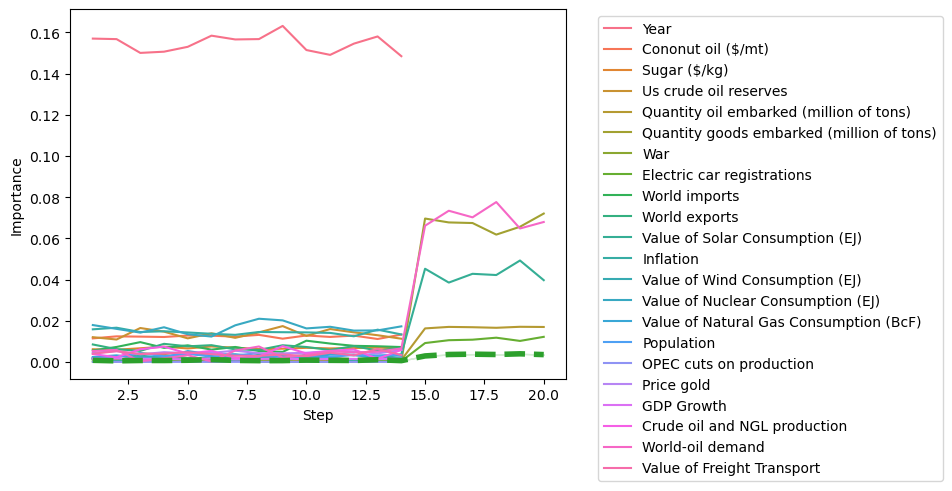

                                      Feature  Importance
0                                        Year    0.158614
13          Value of Nuclear Consumption (EJ)    0.015476
11                                  Inflation    0.013107
1                          Cononut oil ($/mt)    0.012889
3                       Us crude oil reserves    0.009223
2                                Sugar ($/kg)    0.008493
8                               World imports    0.008443
9                               World exports    0.007656
17                                 Price gold    0.004879
19               Crude oil and NGL production    0.004032
14     Value of Natural Gas Consumption (BcF)    0.003664
15                                 Population    0.003112
21                 Value of Freight Transport    0.002956
12             Value of Wind Consumption (EJ)    0.001960
5   Quantity goods embarked (million of tons)    0.001678
6                                         War    0.001520
18            

In [ ]:
# low p value = 0.001

# Parameter that controls the statistical significance of the feature importance

# The p-value is the threshold that determines whether a feature is considered important or not.  
# A feature is considered important if its importance score is significantly higher than the importance score of the random shadow features with a p-value of p

# A lower p-value threshold leads to a stricter selection criterion, resulting in a more conservative selection of features. 
# Conversely, a higher p-value threshold leads to a higher number of features being considered relevant.


boruta = eBoruta(n_iter = 20, verbose=2, classification = False, test_stratify = False, pvalue = 0.001) # percentile = 70 test_size = 0.3
boruta.fit(x, y);
features = boruta.features_
print(features.accepted, features.rejected, features.tentative)
df = features.history
plot_imp_history(df)
r=boruta.rank(sort = True)
print(r)
dictionary = dict(zip(r['Feature'], r['Importance'].apply(lambda x: [x])))
print(dictionary)


Boruta trials:   0%|          | 0/20 [00:00<?, ?it/s]

['Year' 'Cononut oil ($/mt)' 'Sugar ($/kg)' 'Us crude oil reserves'
 'Quantity oil embarked (million of tons)'
 'Quantity goods embarked (million of tons)' 'War' 'World imports'
 'World exports' 'Value of Solar Consumption (EJ)' 'Inflation'
 'Value of Wind Consumption (EJ)' 'Value of Nuclear Consumption (EJ)'
 'Value of Natural Gas Consumption (BcF)' 'Population' 'Price gold'
 'GDP Growth' 'Crude oil and NGL production' 'World-oil demand'
 'Value of Freight Transport'] ['OPEC cuts on production'] ['Electric car registrations']


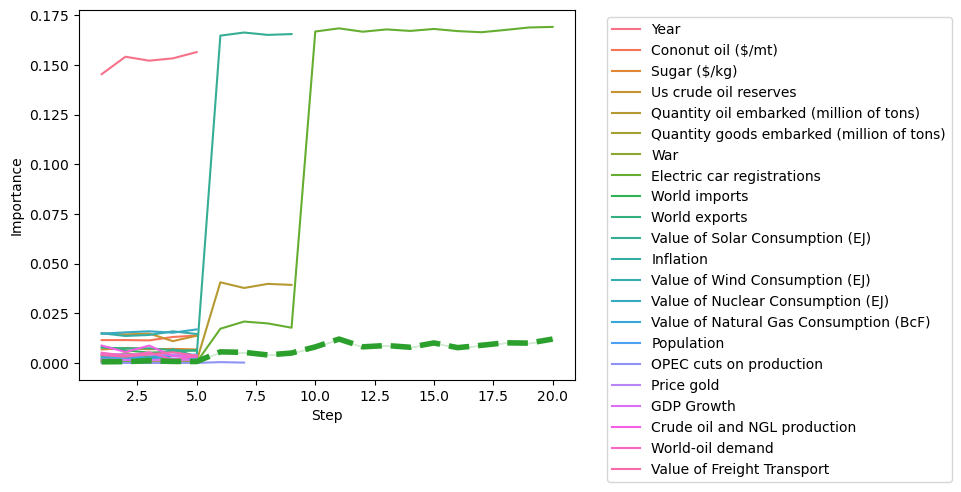

                                      Feature  Importance
0                                        Year    0.146778
13          Value of Nuclear Consumption (EJ)    0.016922
11                                  Inflation    0.014255
1                          Cononut oil ($/mt)    0.013114
3                       Us crude oil reserves    0.008423
2                                Sugar ($/kg)    0.007067
8                               World imports    0.006365
17                                 Price gold    0.006098
20                           World-oil demand    0.006055
9                               World exports    0.005846
5   Quantity goods embarked (million of tons)    0.004573
19               Crude oil and NGL production    0.004324
14     Value of Natural Gas Consumption (BcF)    0.004214
15                                 Population    0.003613
10            Value of Solar Consumption (EJ)    0.003391
12             Value of Wind Consumption (EJ)    0.003261
21            

In [ ]:
# High p value = 0.1

boruta = eBoruta(n_iter = 20, verbose=2, classification = False, test_stratify = False, pvalue = 0.2) # percentile = 70 test_size = 0.3
boruta.fit(x, y);
features = boruta.features_
print(features.accepted, features.rejected, features.tentative)
df = features.history
plot_imp_history(df)
r=boruta.rank(sort = True)
print(r)
dictionary = dict(zip(r['Feature'], r['Importance'].apply(lambda x: [x])))
print(dictionary)

## Change percentile

Boruta trials:   0%|          | 0/20 [00:00<?, ?it/s]

['Year' 'Cononut oil ($/mt)' 'Sugar ($/kg)' 'Us crude oil reserves'
 'Quantity oil embarked (million of tons)'
 'Quantity goods embarked (million of tons)' 'War' 'World imports'
 'World exports' 'Value of Solar Consumption (EJ)' 'Inflation'
 'Value of Wind Consumption (EJ)' 'Value of Nuclear Consumption (EJ)'
 'Value of Natural Gas Consumption (BcF)' 'Population' 'Price gold'
 'GDP Growth' 'Crude oil and NGL production' 'World-oil demand'
 'Value of Freight Transport'] ['OPEC cuts on production'] ['Electric car registrations']


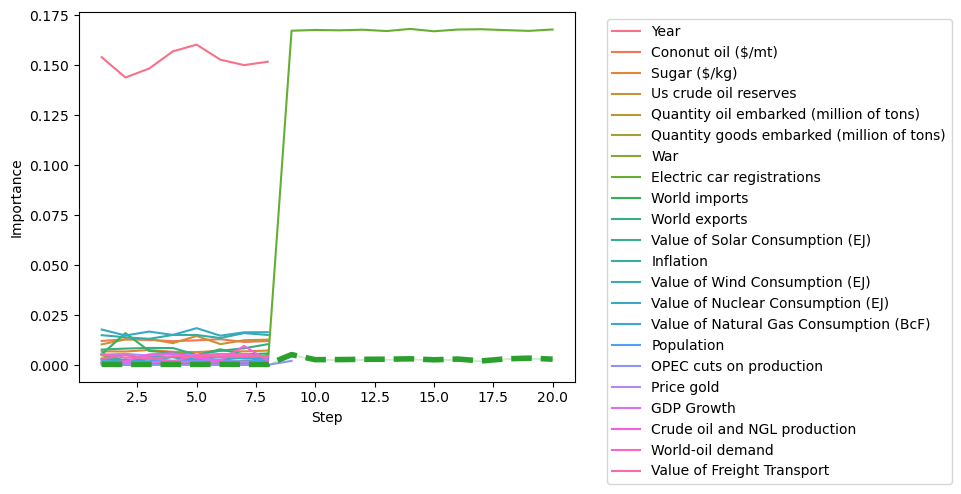

                                      Feature  Importance
0                                        Year    0.136330
13          Value of Nuclear Consumption (EJ)    0.015673
11                                  Inflation    0.013742
1                          Cononut oil ($/mt)    0.013457
9                               World exports    0.011534
19               Crude oil and NGL production    0.010827
2                                Sugar ($/kg)    0.008233
3                       Us crude oil reserves    0.008087
8                               World imports    0.007582
17                                 Price gold    0.005172
5   Quantity goods embarked (million of tons)    0.005079
12             Value of Wind Consumption (EJ)    0.003865
15                                 Population    0.003713
10            Value of Solar Consumption (EJ)    0.003516
21                 Value of Freight Transport    0.002722
14     Value of Natural Gas Consumption (BcF)    0.002204
20            

In [ ]:
# Low percentile = 70
# Parameter that controls the threshold for the feature importance

# If the percentile is set to 90%, the threshold will be set to the 90th percentile of the feature importance scores. 
# Any feature with an importance score above the threshold is considered important.

#Increase the percentile, the threshold for feature importance will be higher, so fewer features will be considered important.  


boruta = eBoruta(n_iter = 20, verbose=2, classification = False, test_stratify = False, percentile = 70) # percentile = 70 test_size = 0.3
boruta.fit(x, y);
features = boruta.features_
print(features.accepted, features.rejected, features.tentative)
df = features.history
plot_imp_history(df)
r=boruta.rank(sort = True)
print(r)
dictionary = dict(zip(r['Feature'], r['Importance'].apply(lambda x: [x])))
print(dictionary)

Boruta trials:   0%|          | 0/20 [00:00<?, ?it/s]

['Year' 'Cononut oil ($/mt)' 'Sugar ($/kg)' 'Us crude oil reserves'
 'Quantity oil embarked (million of tons)'
 'Quantity goods embarked (million of tons)' 'War' 'World imports'
 'World exports' 'Value of Solar Consumption (EJ)' 'Inflation'
 'Value of Wind Consumption (EJ)' 'Value of Nuclear Consumption (EJ)'
 'Value of Natural Gas Consumption (BcF)' 'Population' 'Price gold'
 'GDP Growth' 'Crude oil and NGL production' 'World-oil demand'
 'Value of Freight Transport'] ['OPEC cuts on production'] ['Electric car registrations']


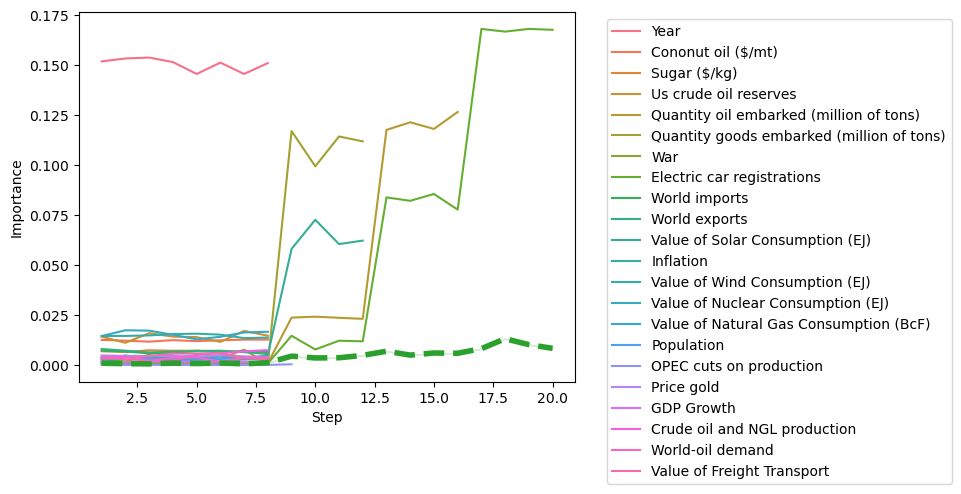

                                      Feature  Importance
0                                        Year    0.149731
13          Value of Nuclear Consumption (EJ)    0.018592
11                                  Inflation    0.015108
1                          Cononut oil ($/mt)    0.013841
8                               World imports    0.009246
3                       Us crude oil reserves    0.008712
2                                Sugar ($/kg)    0.007000
9                               World exports    0.006172
17                                 Price gold    0.005998
19               Crude oil and NGL production    0.004928
12             Value of Wind Consumption (EJ)    0.004524
5   Quantity goods embarked (million of tons)    0.003663
21                 Value of Freight Transport    0.003546
15                                 Population    0.003508
20                           World-oil demand    0.003383
14     Value of Natural Gas Consumption (BcF)    0.002507
6             

In [ ]:
# High percentile = 100

boruta = eBoruta(n_iter = 20, verbose=2, classification = False, test_stratify = False, percentile = 100) # percentile = 70 test_size = 0.3
boruta.fit(x, y);
features = boruta.features_
print(features.accepted, features.rejected, features.tentative)
df = features.history
plot_imp_history(df)
r=boruta.rank(sort = True)
print(r)
dictionary = dict(zip(r['Feature'], r['Importance'].apply(lambda x: [x])))
print(dictionary)

In [ ]:
?eBoruta

## With appropriate parameters

Boruta trials:   0%|          | 0/20 [00:00<?, ?it/s]

['Year' 'Cononut oil ($/mt)' 'Sugar ($/kg)' 'Us crude oil reserves'
 'Quantity oil embarked (million of tons)' 'War' 'World imports'
 'World exports' 'Value of Solar Consumption (EJ)' 'Inflation'
 'Value of Wind Consumption (EJ)' 'Value of Nuclear Consumption (EJ)'
 'Value of Natural Gas Consumption (BcF)' 'Population' 'Price gold'
 'GDP Growth' 'Crude oil and NGL production' 'Value of Freight Transport'] ['Pandemic (covid)' 'OPEC cuts on production'] ['Quantity goods embarked (million of tons)' 'Electric car registrations'
 'World-oil demand']


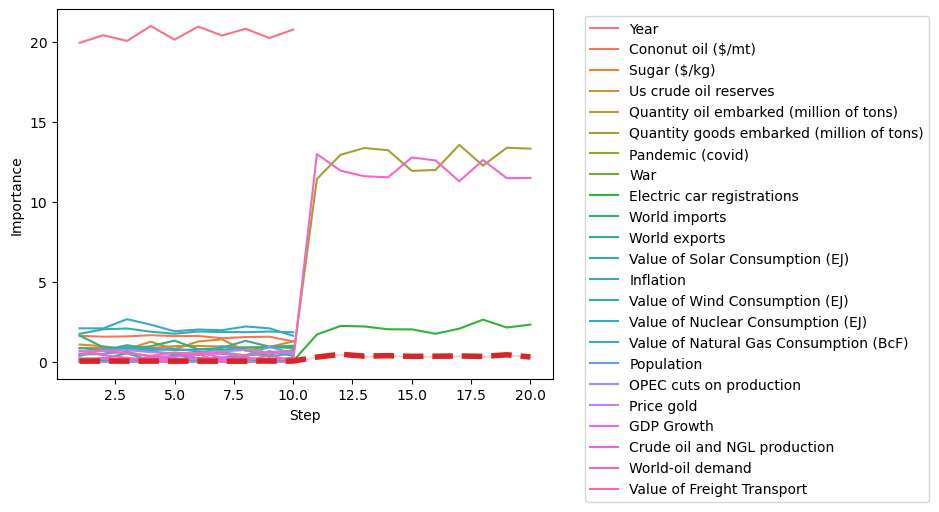

                                      Feature  Importance
0                                        Year   20.683761
14          Value of Nuclear Consumption (EJ)    2.247001
12                                  Inflation    1.967047
1                          Cononut oil ($/mt)    1.781908
3                       Us crude oil reserves    1.529773
2                                Sugar ($/kg)    1.073666
10                              World exports    0.846162
9                               World imports    0.788154
18                                 Price gold    0.709920
22                 Value of Freight Transport    0.594799
11            Value of Solar Consumption (EJ)    0.547361
13             Value of Wind Consumption (EJ)    0.500222
15     Value of Natural Gas Consumption (BcF)    0.473678
21                           World-oil demand    0.470438
16                                 Population    0.451585
19                                 GDP Growth    0.217480
7             

In [11]:
boruta = eBoruta(n_iter = 20, verbose=2, classification = False, test_stratify = False, pvalue = 0.01, percentile = 80) 
boruta.fit(x, y);
features = boruta.features_
print(features.accepted, features.rejected, features.tentative)
df = features.history
plot_imp_history(df)
r=boruta.rank(sort = True)
print(r)
dictionary = dict(zip(r['Feature'], r['Importance'].apply(lambda x: [x])))
print(dictionary)

## XG boost

In [ ]:
df = pd.read_csv('data_final1.csv')
# x = df.loc[:, ~df.columns.isin(['Oil brent price ($/bbl)', 'Year'])]
x = df.loc[:, ~df.columns.isin(['Oil brent price ($/bbl)'])]
y = df['Oil brent price ($/bbl)'].values

In [ ]:
boost = XGBRegressor()
boost.fit(x, y)
p_boost = boost.predict(x)
print ("Score Train -->", round(boost.score(x, y) *100,2), " %")

Score Train --> 100.0  %


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

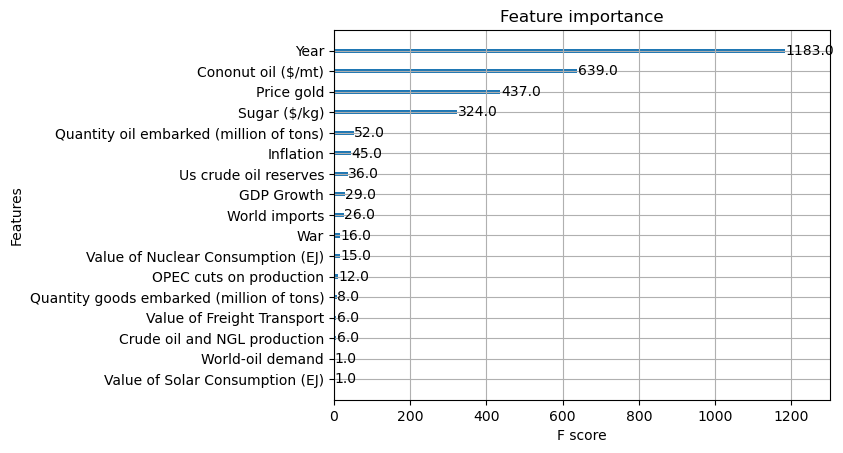

In [ ]:
xgb.plot_importance(boost)

xgboost : Year, Coconut oil, price gold, Sugar

{'Year': 0.1489505673332783, 'Value of Nuclear Consumption (EJ)': 0.01462763839791, 'Inflation': 0.014198913839754823, 'Cononut oil ($/mt)': 0.013195573705817356, 'Us crude oil reserves': 0.010147470195709276, 'Sugar ($/kg)': 0.007794974340366925, 'World exports': 0.0077563129344866075, 'World imports': 0.006317401197917207, 'Price gold': 0.005648087860098082, 'Crude oil and NGL production': 0.004931102979384357, 'Value of Freight Transport': 0.00476424898372299, 'World-oil demand': 0.004464722945005599, 'Value of Wind Consumption (EJ)': 0.00379061317841297, 'Population': 0.0033093208276086025, 'Quantity goods embarked (million of tons)': 0.0028612914829819858, 'Value of Natural Gas Consumption (BcF)': 0.0026580636882574007, 'Value of Solar Consumption (EJ)': 0.001878276476814547, 'GDP Growth': 0.0017399844491398598, 'War': 0.0016690670541652667, 'Quantity oil embarked (million of tons)': 0.0010010151870496805, 'Electric car registrations': 0.00033460105600134675, 'OPEC cuts on production': 9.788355286485611e-05}

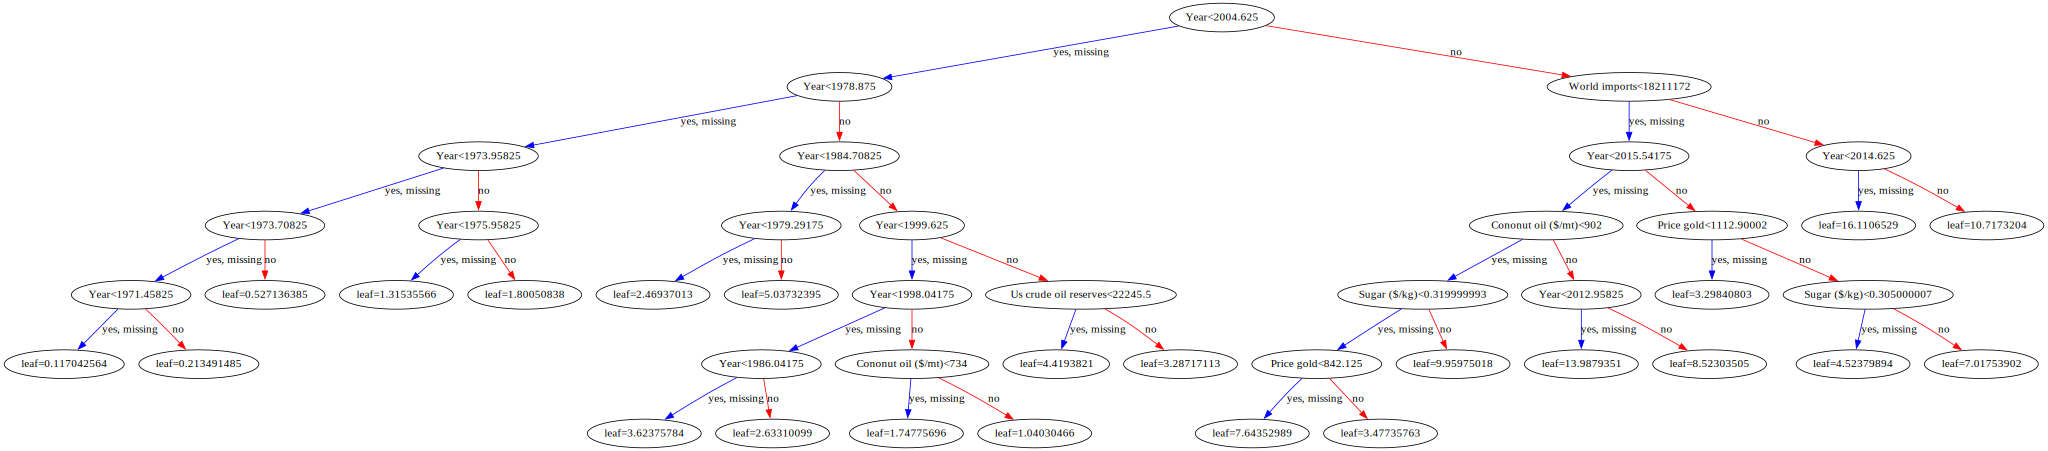

In [ ]:
xgb.to_graphviz(boost, num_trees=2)

- ‘weight’: the number of times a feature is used to split the data across all trees.

- ‘gain’: the average gain across all splits the feature is used in.

- ‘cover’: the average coverage across all splits the feature is used in.

- ‘total_gain’: the total gain across all splits the feature is used in.

- ‘total_cover’: the total coverage across all splits the feature is used in.

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


Boruta trials:   0%|          | 0/20 [00:00<?, ?it/s]

                                      Feature  Importance
22                 Value of Freight Transport    0.461583
12                                  Inflation    0.182272
9                               World imports    0.149120
0                                        Year    0.091471
5   Quantity goods embarked (million of tons)    0.072491
20               Crude oil and NGL production    0.013580
1                          Cononut oil ($/mt)    0.005383
19                                 GDP Growth    0.005216
4     Quantity oil embarked (million of tons)    0.005203
14          Value of Nuclear Consumption (EJ)    0.003412
2                                Sugar ($/kg)    0.003081
3                       Us crude oil reserves    0.003043
7                                         War    0.002602
18                                 Price gold    0.000874
17                    OPEC cuts on production    0.000337
21                           World-oil demand    0.000175
11            

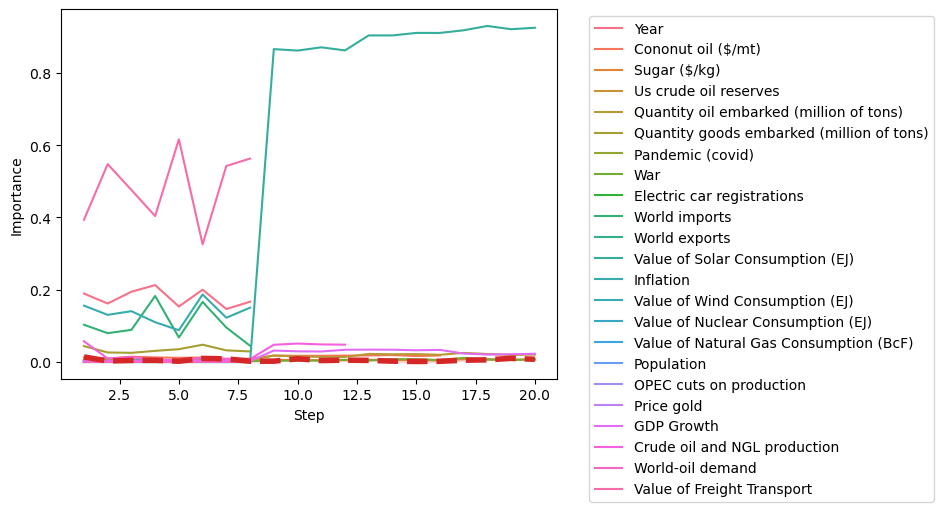

Boruta trials:   0%|          | 0/20 [00:00<?, ?it/s]

                                      Feature  Importance
0                                        Year    0.400158
1                          Cononut oil ($/mt)    0.221474
18                                 Price gold    0.157686
2                                Sugar ($/kg)    0.108162
4     Quantity oil embarked (million of tons)    0.028130
12                                  Inflation    0.017036
3                       Us crude oil reserves    0.016244
19                                 GDP Growth    0.014263
7                                         War    0.008320
9                               World imports    0.007132
14          Value of Nuclear Consumption (EJ)    0.006339
22                 Value of Freight Transport    0.004358
20               Crude oil and NGL production    0.003962
17                    OPEC cuts on production    0.003170
5   Quantity goods embarked (million of tons)    0.001981
21                           World-oil demand    0.001189
11            

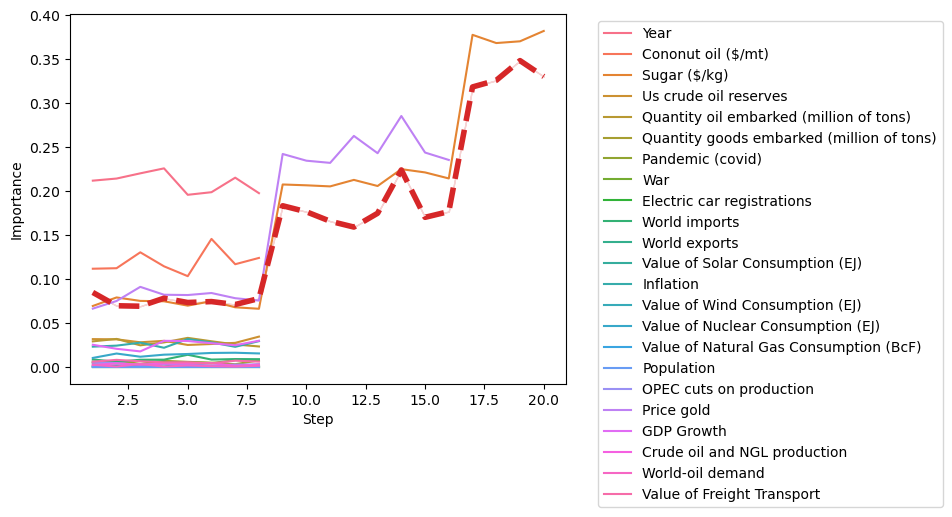

Boruta trials:   0%|          | 0/20 [00:00<?, ?it/s]

                                      Feature  Importance
20               Crude oil and NGL production    0.102700
22                 Value of Freight Transport    0.098758
17                    OPEC cuts on production    0.097988
4     Quantity oil embarked (million of tons)    0.084391
3                       Us crude oil reserves    0.083255
12                                  Inflation    0.066092
9                               World imports    0.061682
5   Quantity goods embarked (million of tons)    0.055969
1                          Cononut oil ($/mt)    0.055191
14          Value of Nuclear Consumption (EJ)    0.052661
18                                 Price gold    0.050852
2                                Sugar ($/kg)    0.046326
19                                 GDP Growth    0.044374
0                                        Year    0.033532
21                           World-oil demand    0.031244
7                                         War    0.028579
11            

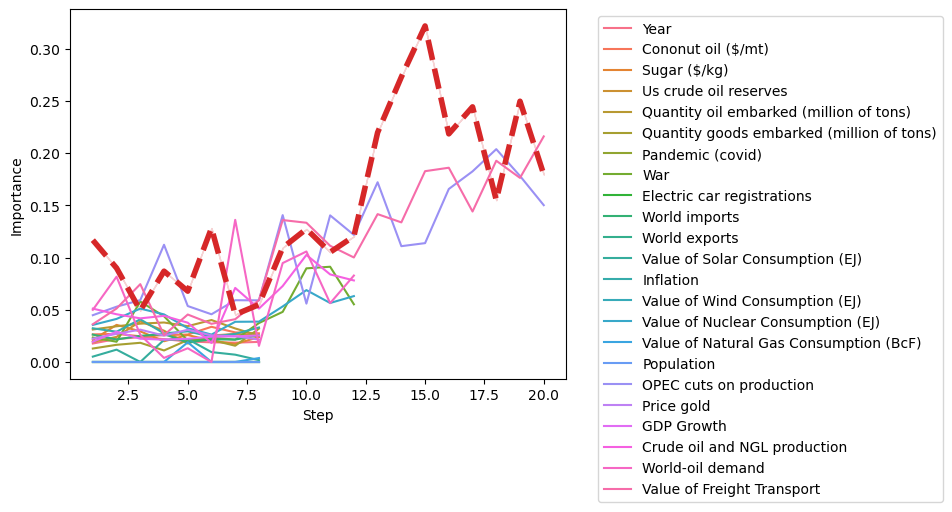

Boruta trials:   0%|          | 0/20 [00:00<?, ?it/s]

                                      Feature  Importance
0                                        Year    0.814146
12                                  Inflation    0.069070
22                 Value of Freight Transport    0.044745
1                          Cononut oil ($/mt)    0.026517
9                               World imports    0.023654
2                                Sugar ($/kg)    0.007412
4     Quantity oil embarked (million of tons)    0.003255
5   Quantity goods embarked (million of tons)    0.003194
18                                 Price gold    0.003064
19                                 GDP Growth    0.001655
20               Crude oil and NGL production    0.001197
3                       Us crude oil reserves    0.001099
7                                         War    0.000482
14          Value of Nuclear Consumption (EJ)    0.000481
17                    OPEC cuts on production    0.000024
21                           World-oil demand    0.000005
11            

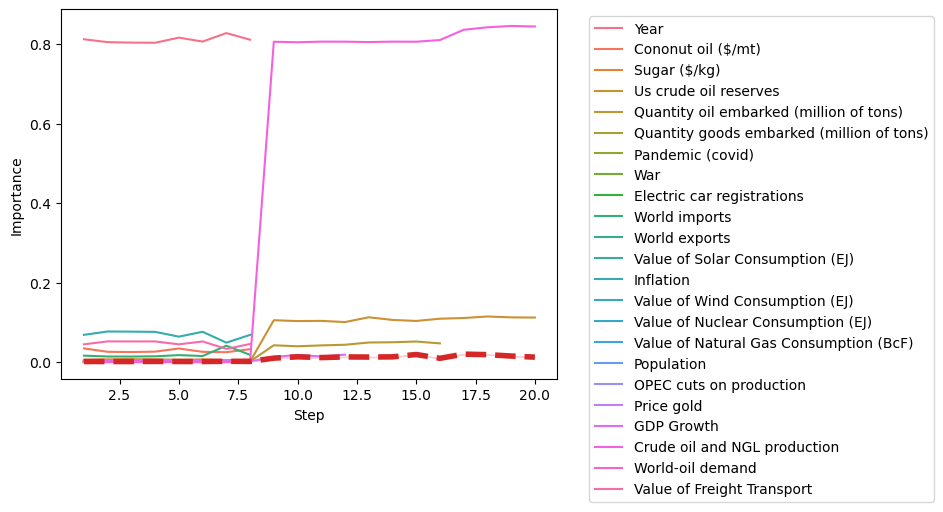

Boruta trials:   0%|          | 0/20 [00:00<?, ?it/s]

                                      Feature  Importance
0                                        Year    0.288777
1                          Cononut oil ($/mt)    0.263058
18                                 Price gold    0.172569
2                                Sugar ($/kg)    0.107836
4     Quantity oil embarked (million of tons)    0.051089
3                       Us crude oil reserves    0.029105
12                                  Inflation    0.024232
19                                 GDP Growth    0.013621
9                               World imports    0.009467
22                 Value of Freight Transport    0.009263
20               Crude oil and NGL production    0.008757
14          Value of Nuclear Consumption (EJ)    0.007184
17                    OPEC cuts on production    0.006684
7                                         War    0.005117
5   Quantity goods embarked (million of tons)    0.002386
21                           World-oil demand    0.000799
11            

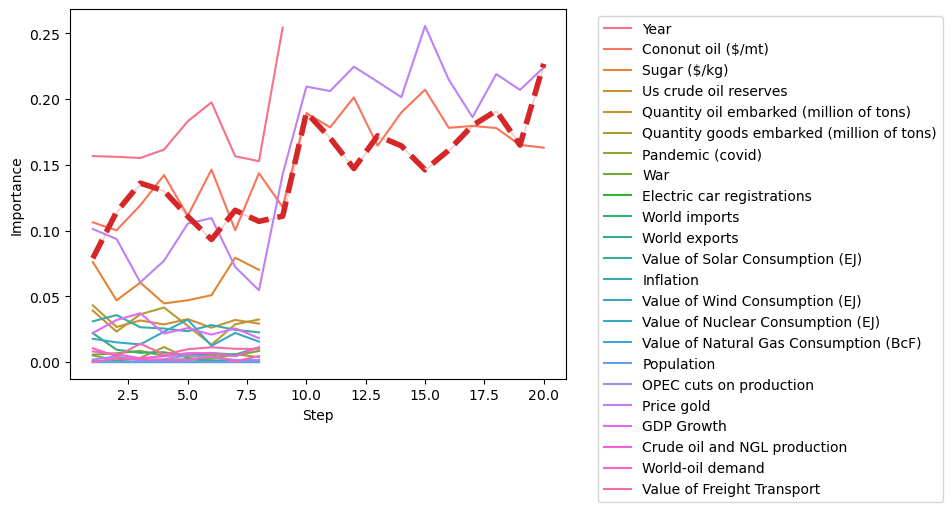

In [12]:
data = pd.read_csv('data_final1.csv')
y = data['Oil brent price ($/bbl)']
y = (y - y.min()) / (y.max() - y.min())
#x_selected = data.drop(['Oil brent price ($/bbl)', 'Pandemic (covid)', 'OPEC cuts on production', 'War', 'Electric car registrations'], 1)
x_selected = data.drop(['Oil brent price ($/bbl)'], 1)

importance_measures = ['gain', 'weight', 'cover', 'total_gain', 'total_cover']
for importance_type in importance_measures:
    xgb_model = XGBRegressor(importance_type = importance_type)
    eboruta = eBoruta(n_iter=20, verbose=2, classification=False, test_stratify=False, shap_tree=False)
    eboruta.fit(x_selected, y, model=xgb_model)

    r=eboruta.rank(sort = True)
    print(r)
    
    features = eboruta.features_
    print(f'Accepted: {features.accepted}')
    print(f'Rejected: {features.rejected}')
    print(f'Tentative: {features.tentative}')
    
    df = features.history
    plot_imp_history(df)
    


'Year': 0.1489505673332783, 'Value of Nuclear Consumption (EJ)': 0.01462763839791, 'Inflation': 0.014198913839754823, 'Cononut oil ($/mt)': 0.013195573705817356, 'Us crude oil reserves': 0.010147470195709276, 'Sugar ($/kg)': 0.007794974340366925, 'World exports': 0.0077563129344866075, 'World imports': 0.006317401197917207, 'Price gold': 0.005648087860098082, 'Crude oil and NGL production': 0.004931102979384357, 'Value of Freight Transport': 0.00476424898372299, 'World-oil demand': 0.004464722945005599, 'Value of Wind Consumption (EJ)': 0.00379061317841297, 'Population': 0.0033093208276086025, 'Quantity goods embarked (million of tons)': 0.0028612914829819858, 'Value of Natural Gas Consumption (BcF)': 0.0026580636882574007, 'Value of Solar Consumption (EJ)': 0.001878276476814547, 'GDP Growth': 0.0017399844491398598, 'War': 0.0016690670541652667, 'Quantity oil embarked (million of tons)': 0.0010010151870496805, 'Electric car registrations': 0.00033460105600134675, 'OPEC cuts on production': 9.788355286485611e-05

Boruta trials:   0%|          | 0/20 [00:00<?, ?it/s]

                                      Feature  Importance
0                                        Year    0.814146
12                                  Inflation    0.069070
22                 Value of Freight Transport    0.044745
1                          Cononut oil ($/mt)    0.026517
9                               World imports    0.023654
2                                Sugar ($/kg)    0.007412
4     Quantity oil embarked (million of tons)    0.003255
5   Quantity goods embarked (million of tons)    0.003194
18                                 Price gold    0.003064
19                                 GDP Growth    0.001655
20               Crude oil and NGL production    0.001197
3                       Us crude oil reserves    0.001099
7                                         War    0.000482
14          Value of Nuclear Consumption (EJ)    0.000481
17                    OPEC cuts on production    0.000024
21                           World-oil demand    0.000005
11            

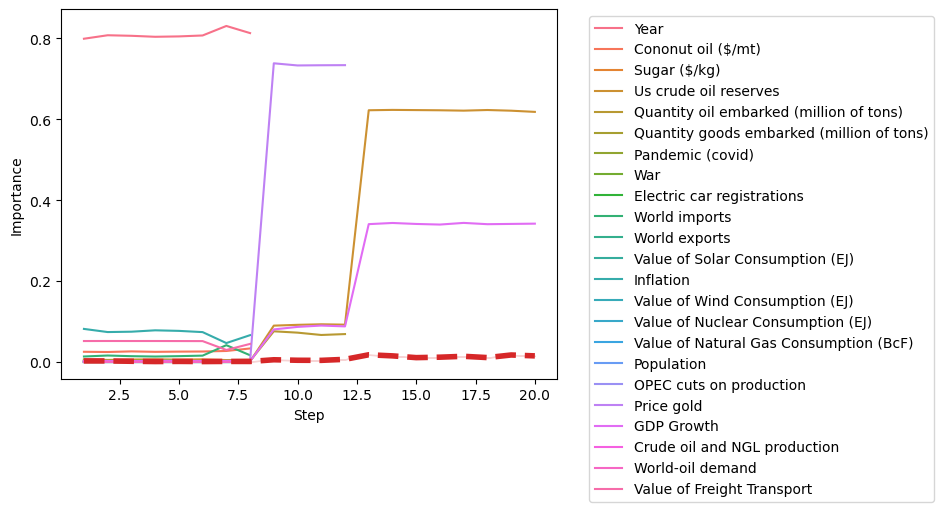

In [15]:

    xgb_model = XGBRegressor(importance_type = 'total_gain')
    eboruta = eBoruta(n_iter=20, verbose=2, classification=False, test_stratify=False, shap_tree=False)
    eboruta.fit(x_selected, y, model=xgb_model)

    r=eboruta.rank(sort = True)
    print(r)
    
    features = eboruta.features_
    print(f'Accepted: {features.accepted}')
    print(f'Rejected: {features.rejected}')
    print(f'Tentative: {features.tentative}')
    
    df = features.history
    plot_imp_history(df)

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


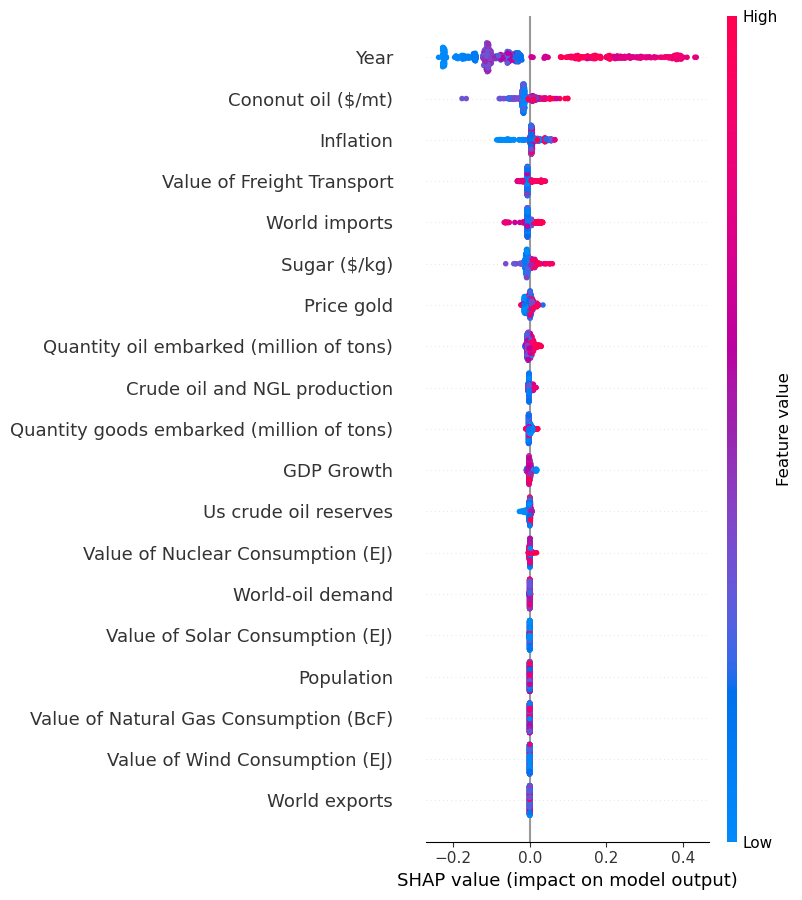

In [ ]:
data = pd.read_csv('data_final1.csv')
y = data['Oil brent price ($/bbl)']
y = (y - y.min()) / (y.max() - y.min())
x_selected = data.drop(['Oil brent price ($/bbl)', 'Pandemic (covid)', 'OPEC cuts on production', 'War', 'Electric car registrations'], 1)

model = XGBRegressor()

model.fit(x_selected, y)

explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(x_selected)

shap.summary_plot(shap_values, x_selected, feature_names=x_selected.columns)


Result of feature selection with Shap values:  
Year, coconut oil, Inflation, Value of freight transport, word imports, sugar, price gold, quantity oil embarked

{'Year': 0.1489505673332783, 'Value of Nuclear Consumption (EJ)': 0.01462763839791, 'Inflation': 0.014198913839754823, 'Cononut oil ($/mt)': 0.013195573705817356, 'Us crude oil reserves': 0.010147470195709276, 'Sugar ($/kg)': 0.007794974340366925, 'World exports': 0.0077563129344866075, 'World imports': 0.006317401197917207, 'Price gold': 0.005648087860098082, 'Crude oil and NGL production': 0.004931102979384357, 'Value of Freight Transport': 0.00476424898372299, 'World-oil demand': 0.004464722945005599, 'Value of Wind Consumption (EJ)': 0.00379061317841297, 'Population': 0.0033093208276086025, 'Quantity goods embarked (million of tons)': 0.0028612914829819858, 'Value of Natural Gas Consumption (BcF)': 0.0026580636882574007, 'Value of Solar Consumption (EJ)': 0.001878276476814547, 'GDP Growth': 0.0017399844491398598, 'War': 0.0016690670541652667, 'Quantity oil embarked (million of tons)': 0.0010010151870496805, 'Electric car registrations': 0.00033460105600134675, 'OPEC cuts on production': 9.788355286485611e-05}